Section 1: Querying a database in python

In [94]:
!pip install psycopg2


In [95]:
import psycopg2
import pandas as pd

# Database connection configuration
db_name = "dvdrental"
db_user = "postgres"
db_password = "password"
db_host = "localhost"

# Connect to the database
conn = psycopg2.connect(dbname=db_name, user=db_user, password=db_password, host=db_host)

# Execute the query and store the results in a DataFrame
query = """
SELECT f.*, r.*, p.*
FROM rental r
JOIN payment p ON r.rental_id = p.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id;
"""
df_complete_info = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Now you can safely use the df_complete_info DataFrame
print(df_complete_info.head())  # Print the first few rows of the DataFrame




/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   film_id            title                                        description  release_year  language_id  rental_duration  rental_rate  length  replacement_cost rating             last_update                     special_features                                           fulltext  rental_id         rental_date  inventory_id  customer_id         return_date  staff_id         last_update  payment_id  customer_id  staff_id  rental_id  amount               payment_date
0      749      Rules Human  A Beautiful Epistle of a Astronaut And a Stude...          2006            1                6         4.99     153             19.99      R 2013-05-26 14:50:58.951  [Deleted Scenes, Behind the Scenes]  'abandon':19 'astronaut':8 'beauti':4 'confron...       1520 2005-06-15 23:57:20          3419          341 2005-06-24 23:46:20         1 2006-02-16 02:30:53       17503          341         2       1520    7.99 2007-02-15 22:25:46.996577
1      552  Majestic Floats  A Thrilling Character Study of 

Section 2: Manipulating dataframes

In [96]:
# Step 1: Create a Column for Customer Name
df_customers['full_name'] = df_customers['first_name'] + ' ' + df_customers['last_name']

# Step 2: Remove Inactive Customers
df_customers = df_customers[df_customers['active'] == 1]

# Step 3: Change Email Addresses
def update_email(row):
    if row['store_id'] % 2 == 0:  # Check if store_id is even
        return 'joe.person@wustl.edu'
    else:
        return row['email']

df_customers['email'] = df_customers.apply(update_email, axis=1)

# Display the updated DataFrame
print(df_customers.head())


   customer_id  store_id first_name last_name                                email  address_id  activebool create_date             last_update  active         full_name
0          524         1      Jared       Ely         jared.ely@sakilacustomer.org         530        True  2006-02-14 2013-05-26 14:49:45.738       1         Jared Ely
1            1         1       Mary     Smith        mary.smith@sakilacustomer.org           5        True  2006-02-14 2013-05-26 14:49:45.738       1        Mary Smith
2            2         1   Patricia   Johnson  patricia.johnson@sakilacustomer.org           6        True  2006-02-14 2013-05-26 14:49:45.738       1  Patricia Johnson
3            3         1      Linda  Williams    linda.williams@sakilacustomer.org           7        True  2006-02-14 2013-05-26 14:49:45.738       1    Linda Williams
4            4         2    Barbara     Jones                 joe.person@wustl.edu           8        True  2006-02-14 2013-05-26 14:49:45.738       1     

Section 3: Visualizations

   customer_id  total_spend
0          184        80.80
1           87       137.72
2          477       106.79
3          273       130.72
4          550       151.69


/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


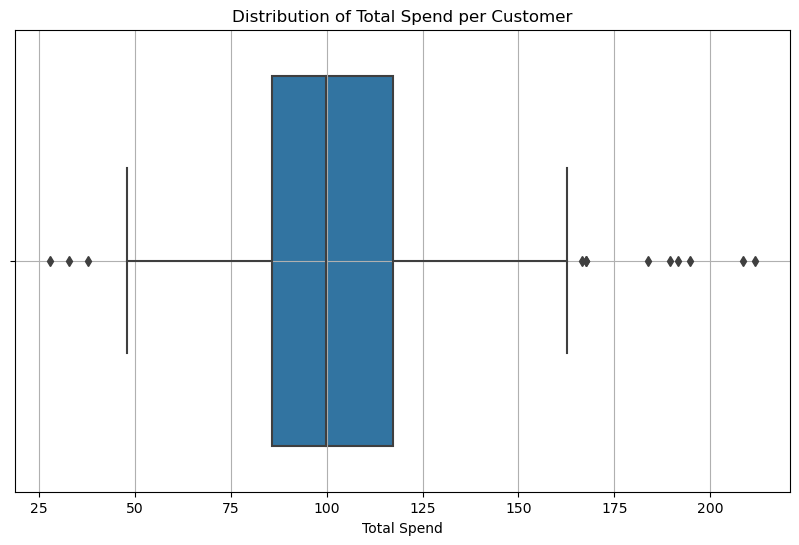

In [97]:
import psycopg2
import pandas as pd

# Your database connection parameters
conn_params = {
    'dbname': 'dvdrental',
    'user': 'postgres',
    'password': 'password',
    'host': 'localhost',
    'port': '5432'  # default PostgreSQL port
}

# SQL query
sql_query = """
SELECT
    c.customer_id,
    SUM(p.amount) AS total_spend
FROM
    customer c
JOIN
    rental r ON c.customer_id = r.customer_id
JOIN
    payment p ON r.rental_id = p.rental_id
GROUP BY
    c.customer_id;
"""

try:
    # Connect to the database
    conn = psycopg2.connect(**conn_params)
    
    # Execute the query and load into a pandas DataFrame
    df = pd.read_sql_query(sql_query, conn)
    
    # Display the first few rows of the DataFrame
    print(df.head())
    
    # Close the connection
    conn.close()
    
except Exception as e:
    print(f"Database connection failed due to {e}")  
# Create the box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_spend', data=df)
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend')
plt.grid(True)
plt.show()


/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


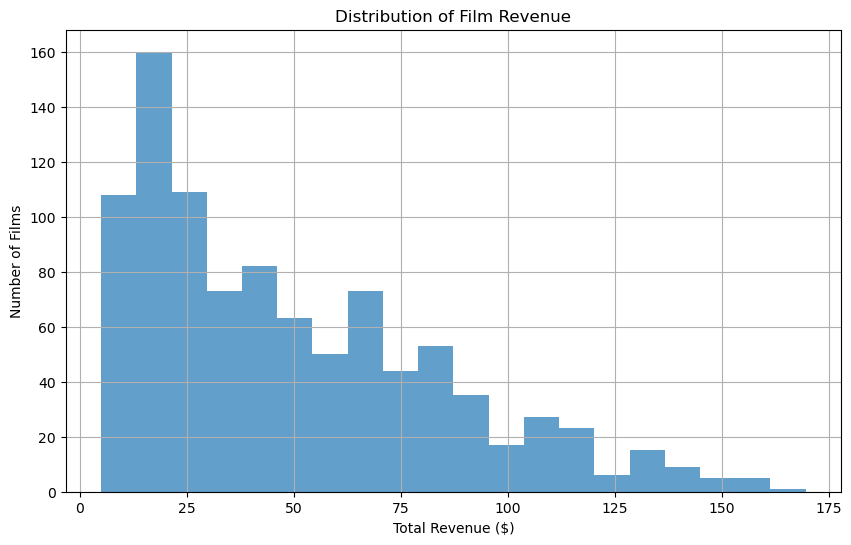

In [98]:
#Distribution of Film Revenue
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Your database connection parameters
conn_params = {
    'dbname': 'dvdrental',
    'user': 'postgres',
    'password': 'password',
    'host': 'localhost',
    # 'port': '5432'  # Default port for PostgreSQL, include if it's different
}

# SQL query to calculate total revenue by film
sql_query = """
SELECT
    f.film_id,
    f.title,
    SUM(f.rental_rate) AS total_revenue
FROM
    film f
JOIN
    inventory i ON f.film_id = i.film_id
JOIN
    rental r ON i.inventory_id = r.inventory_id
GROUP BY
    f.film_id, f.title;
"""

try:
    # Connect to the database
    conn = psycopg2.connect(**conn_params)
    
    # Execute the query and load into a pandas DataFrame
    df = pd.read_sql_query(sql_query, conn)
    
    # Ensure the total_revenue column is treated as a float for the histogram
    df['total_revenue'] = df['total_revenue'].astype(float)
    
    # Close the database connection
    conn.close()
    
    # Create the histogram for total revenue distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['total_revenue'], bins=20, alpha=0.7)
    plt.title('Distribution of Film Revenue')
    plt.xlabel('Total Revenue ($)')
    plt.ylabel('Number of Films')
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"An error occurred: {e}")



Section 4: Analysis

/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


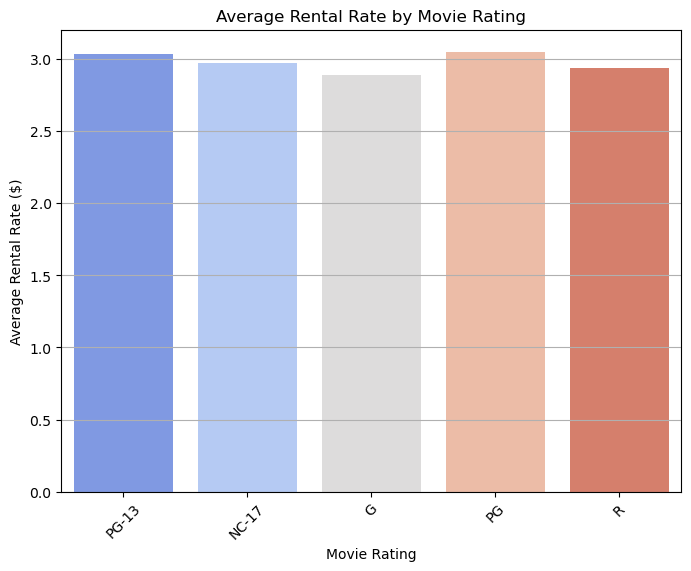

In [99]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establish database connection
conn = psycopg2.connect(dbname="dvdrental", user="postgres", password="password", host="localhost")

# SQL query for average rental rate by movie rating
sql_query_1 = """
SELECT
    rating,
    AVG(rental_rate) AS avg_rental_rate
FROM
    film
GROUP BY
    rating;
"""

# Execute the query and load results into a DataFrame
df_avg_rental_rate = pd.read_sql_query(sql_query_1, conn)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='rating', y='avg_rental_rate', data=df_avg_rental_rate, palette='coolwarm')
plt.title('Average Rental Rate by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Average Rental Rate ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Close the database connection
conn.close()


/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


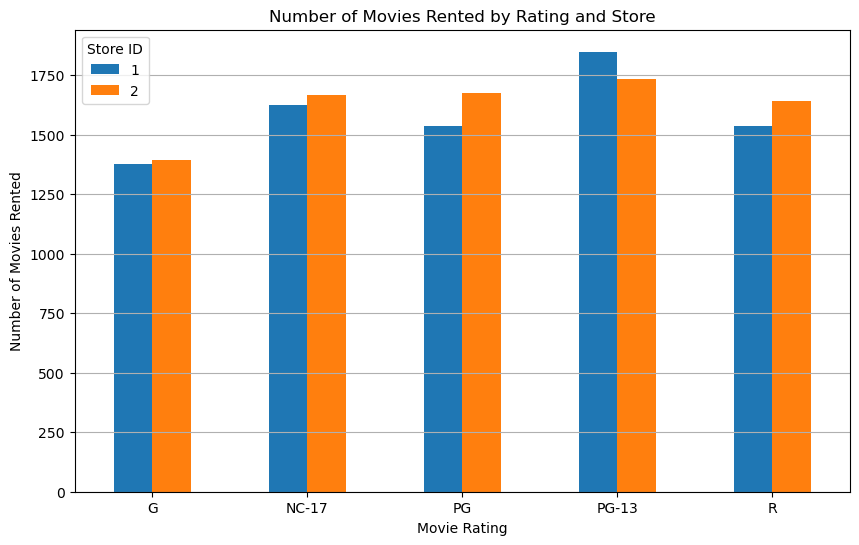

In [100]:
# Establish database connection
conn = psycopg2.connect(dbname="dvdrental", user="postgres", password="password", host="localhost")

# SQL query for number of movies rented by rating and store
sql_query_2 = """
SELECT
    f.rating,
    i.store_id,
    COUNT(r.rental_id) AS rental_count
FROM
    rental r
JOIN
    inventory i ON r.inventory_id = i.inventory_id
JOIN
    film f ON i.film_id = f.film_id
GROUP BY
    f.rating, i.store_id;
"""

# Execute the query and load results into a DataFrame
df_store_rentals = pd.read_sql_query(sql_query_2, conn)

# Pivot the DataFrame for visualization
df_pivot = df_store_rentals.pivot(index='rating', columns='store_id', values='rental_count')

# Visualization
df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Movies Rented by Rating and Store')
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies Rented')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Store ID')
plt.show()

# Close the database connection
conn.close()


/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


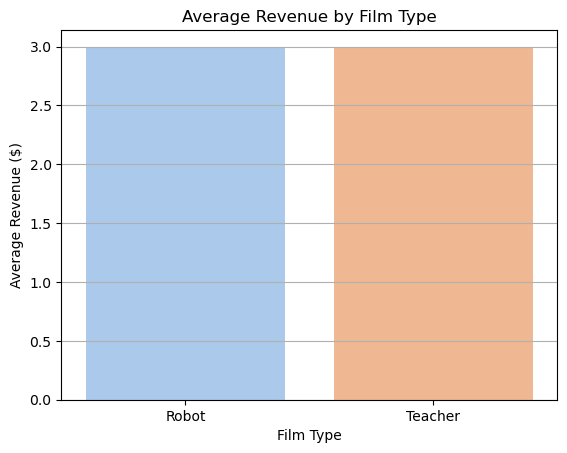

In [101]:
# Establish database connection
conn = psycopg2.connect(dbname="dvdrental", user="postgres", password="password", host="localhost")

# SQL queries for average revenue by film type (Robot vs. Teacher)
sql_query_robot = """
SELECT
    'Robot' AS film_type,
    AVG(rental_rate) AS avg_revenue
FROM
    film
WHERE
    description ILIKE '%robot%';
"""
sql_query_teacher = """
SELECT
    'Teacher' AS film_type,
    AVG(rental_rate) AS avg_revenue
FROM
    film
WHERE
    description ILIKE '%teacher%';
"""

# Execute the queries and load results into DataFrames
df_robot = pd.read_sql_query(sql_query_robot, conn)
df_teacher = pd.read_sql_query(sql_query_teacher, conn)

# Combine the results into a single DataFrame
df_film_types_revenue = pd.concat([df_robot, df_teacher], ignore_index=True)

# Visualization
sns.barplot(x='film_type', y='avg_revenue', data=df_film_types_revenue, palette='pastel')
plt.title('Average Revenue by Film Type')
plt.xlabel('Film Type')
plt.ylabel('Average Revenue ($)')
plt.grid(axis='y')
plt.show()

# Close the database connection
conn.close()


Section 5: Sample Size

,Sample,Mean,Standard Deviation,Standard Error
0,x1,15.514245,2.474922,1.106819
1,x2,15.381559,1.997462,0.399492
2,x3,15.127359,1.927995,0.172445
3,x4,14.887092,1.953080,0.078123


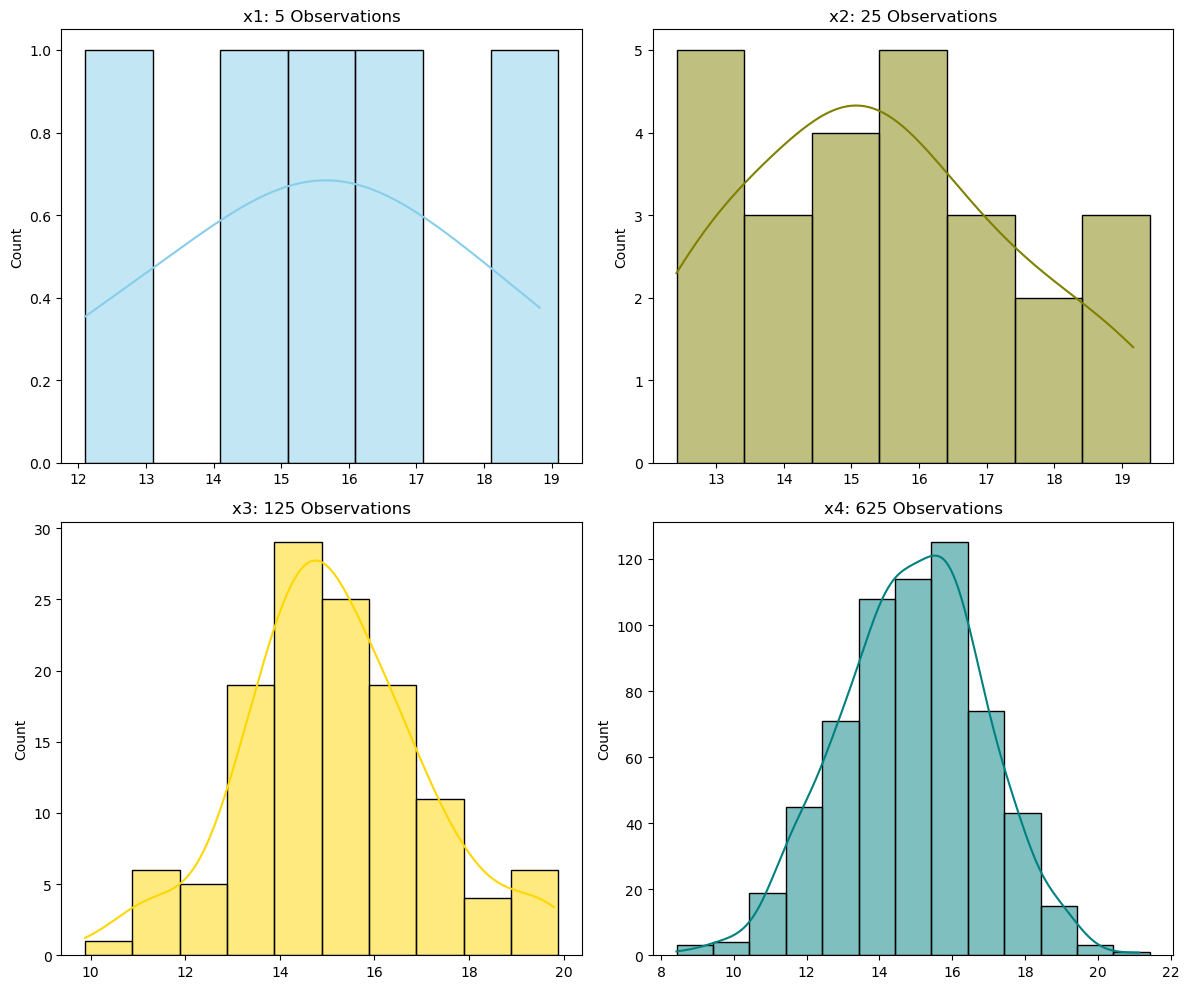

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem  # For standard error

# Set seed for reproducibility
np.random.seed(200)

# Generate observations
x1 = np.random.normal(15, 2, 5)
x2 = np.random.normal(15, 2, 25)
x3 = np.random.normal(15, 2, 125)
x4 = np.random.normal(15, 2, 625)

# Subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x1, kde=True, ax=axs[0, 0], color="skyblue", binwidth=1)
axs[0, 0].set_title('x1: 5 Observations')

sns.histplot(x2, kde=True, ax=axs[0, 1], color="olive", binwidth=1)
axs[0, 1].set_title('x2: 25 Observations')

sns.histplot(x3, kde=True, ax=axs[1, 0], color="gold", binwidth=1)
axs[1, 0].set_title('x3: 125 Observations')

sns.histplot(x4, kde=True, ax=axs[1, 1], color="teal", binwidth=1)
axs[1, 1].set_title('x4: 625 Observations')

plt.tight_layout()

# Compute sample means, standard deviations, and standard errors
stats_df = pd.DataFrame({
    "Sample": ["x1", "x2", "x3", "x4"],
    "Mean": [np.mean(x) for x in [x1, x2, x3, x4]],
    "Standard Deviation": [np.std(x, ddof=1) for x in [x1, x2, x3, x4]],  # ddof=1 for sample std
    "Standard Error": [sem(x) for x in [x1, x2, x3, x4]],
})

stats_df


Comparison to Distribution Parameters:
Mean (Population = 15): 
The means of the samples are relatively close to the population mean of 15, though there are slight deviations. As the sample size increases (from x1 to x4), the sample mean should theoretically converge closer to the population mean due to the Law of Large Numbers. However, x4's mean is slightly below 15, illustrating that individual samples can still deviate from population parameters due to sampling variability.
Standard Deviation (Population = 2): 
The sample standard deviations are all in the vicinity of the population standard deviation, indicating that the spread of the sample observations around the mean is consistent with the population spread. There's a slight variation among the samples, which is normal, as sample standard deviations estimate the population standard deviation and can vary from sample to sample.

Comparison Among Samples:
Sample Means: 
The sample means vary slightly among the different samples, showcasing how sampling variability can affect statistical estimates. The means of smaller samples (x1) tend to fluctuate more significantly from the population mean compared to larger samples.
Standard Deviations: 
The standard deviations across the samples are relatively consistent, all hovering around the population standard deviation of 2. This consistency indicates that, regardless of sample size, the variability of the observations around the mean remains similar to that of the population.
Standard Errors: There's a clear trend of decreasing standard error as the sample size increases, from 1.11 for x1 down to 0.08 for x4. The standard error reflects the uncertainty in the estimate of the mean; thus, larger samples reduce this uncertainty, making the sample mean a more accurate estimate of the population mean.

Section 6: Poisson Distribution

In [103]:
# Re-import numpy and set seed again after the code execution state reset
import numpy as np

np.random.seed(100)  # Set the seed

# Generate a Poisson distribution with lambda = 12 and size = 1200
lam = 12  # Lambda (average rate of success)
size = 1200  # Number of observations

poisson_distribution = np.random.poisson(lam, size)

poisson_distribution[:30]  # Display the first 30 values to get an idea of the distribution


array([12, 11,  7, 17,  8, 16, 16, 16,  8, 15, 13,  7, 26, 17, 15, 13,  9,
       15, 10, 10, 10,  8, 11, 13, 13, 10,  9, 20, 14,  6])

In [104]:
mean_poisson = np.mean(poisson_distribution)
variance_poisson = np.var(poisson_distribution)


print('mean_poisson=', mean_poisson)
print('variance_poisson=', variance_poisson)

mean_poisson= 11.798333333333334
variance_poisson= 11.847663888888889


In a Poisson distribution, the parameter λ (lambda) represents both the mean and the variance of the distribution. Therefore, for a Poisson distribution, it is indeed expected that λ = mean = variance.

From the generated Poisson distribution with λ = 12, we obtained:
Mean: Approximately 11.80
Variance: Approximately 11.85
These values are very close to λ, which is 12. The slight differences are due to the variability inherent in a sample from the distribution.

In [105]:
# Regenerate the Poisson distribution with size = 4
size_small = 4
poisson_distribution_small = np.random.poisson(lam, size_small)

# Compute the mean and variance for the smaller sample size
mean_poisson_small = np.mean(poisson_distribution_small)
variance_poisson_small = np.var(poisson_distribution_small)

print('mean_poisson_small=', mean_poisson_small)
print('variance_poisson_small=', variance_poisson_small)

mean_poisson_small= 12.75
variance_poisson_small= 5.6875


For the Poisson distribution with λ = 12 and a much smaller sample size of 4, we obtained:

Mean: 12.75
Variance: 5.6875
Sample Values: [16, 14, 11, 10]
In this case, λ (lambda) is still 12. However, with such a small sample size, the mean and variance of the sample can differ significantly from λ. 

Section 7: Analysis

7.1The Outcome:
The outcome, in this case, is the amount of money customers spent on DVD rentals before and after the implementation of the customer promotion program. The evaluation of the outcome will involve comparing these two spending amounts to determine the effectiveness of the program.

7.2The Main Effect/Predictor:
The main effect or predictor that the boss is interested in is the customer promotion program itself. He wants to understand the impact of this program on customers' spending habits. This involves examining whether the program has led to an increase or decrease in the amount spent by customers on renting DVDs.

7.3The Hypothesis:
The hypothesis for this analysis could be stated as the customer promotion program has affected the spending habits of customers. Depending on what the boss believes, this could be that the program increased spending (positive effect), decreased spending (negative effect), or just changed spending habits (without specifying direction).

Summary statistics for payments before the promotion program:
count    518.000000
mean      16.119402
std        9.021348
min        0.990000
25%        9.970000
50%       14.960000
75%       20.970000
max       52.900000
Name: payment_before, dtype: float64

Summary statistics for payments after the promotion program:
count    518.000000
mean      88.440444
std       23.278257
min       32.890000
25%       71.845000
50%       85.800000
75%      101.787500
max      188.600000
Name: payment_after, dtype: float64


/Users/brendonj/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


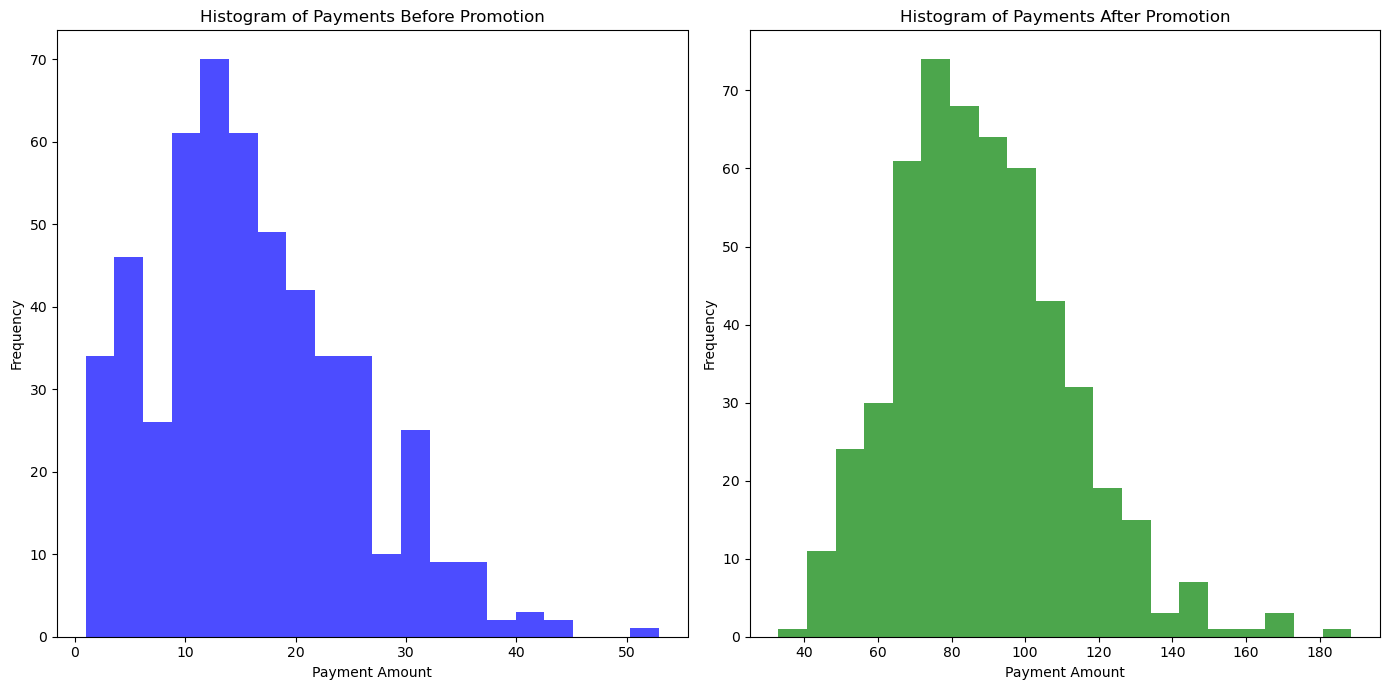

In [106]:
#7.4
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# 数据库连接参数
db_name = "dvdrental"
db_user = "postgres"
db_password = "password"  
db_host = "localhost"

# 创建数据库连接
conn = psycopg2.connect(
    dbname=db_name,
    user=db_user,
    password=db_password,
    host=db_host
)

# 执行SQL查询并加载数据到DataFrame
query = """
WITH b4 AS (
    SELECT p.customer_id, SUM(p.amount) AS Payment_before
    FROM rental r
    LEFT OUTER JOIN payment p ON p.rental_id = r.rental_id
    WHERE rental_date < CAST('2005-07-01' AS TIMESTAMP) AND
    amount IS NOT NULL
    GROUP BY p.customer_id
), aft AS (
    SELECT p.customer_id, SUM(p.amount) AS Payment_after
    FROM rental r
    LEFT OUTER JOIN payment p ON p.rental_id = r.rental_id
    WHERE rental_date >= CAST('2005-07-01' AS TIMESTAMP) AND
    amount IS NOT NULL
    GROUP BY p.customer_id
)
SELECT DISTINCT c.customer_id, store_id, first_name, last_name,
active, Payment_before, Payment_after
FROM customer c
LEFT OUTER JOIN b4 ON b4.customer_id = c.customer_id
LEFT OUTER JOIN aft ON aft.customer_id = c.customer_id
WHERE Payment_after IS NOT NULL AND Payment_before IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# 确保关闭数据库连接
conn.close()

# 计算统计摘要
summary_before = df['payment_before'].describe()
summary_after = df['payment_after'].describe()

# 输出统计摘要
print("Summary statistics for payments before the promotion program:")
print(summary_before)
print("\nSummary statistics for payments after the promotion program:")
print(summary_after)

# 绘制直方图
plt.figure(figsize=(14, 7))

# 直方图：促销前的付款
plt.subplot(1, 2, 1)
plt.hist(df['payment_before'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Payments Before Promotion')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')

# 直方图：促销后的付款
plt.subplot(1, 2, 2)
plt.hist(df['payment_after'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Payments After Promotion')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

pd.set_option('display.max_rows', None)  # 设置为None以显示所有行
pd.set_option('display.max_columns', None)  # 设置为None以显示所有列
pd.set_option('display.width', 1000)  # 设置宽度以避免自动换行


The correlation coefficient between the payments before and after the promotion is: 0.02549906450099284


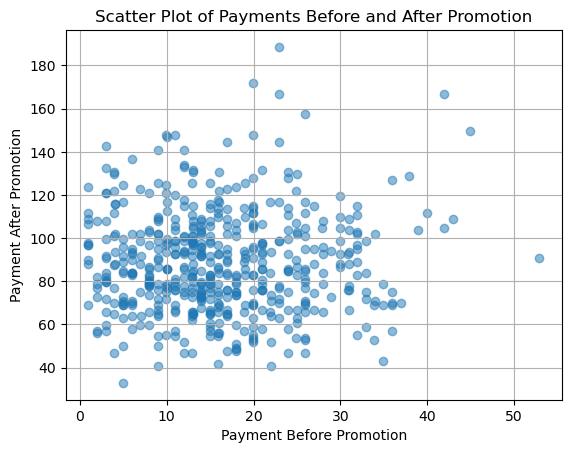

In [107]:
#7.5
# Compute the Pearson correlation coefficient
correlation = df['payment_before'].corr(df['payment_after'])
print(f"The correlation coefficient between the payments before and after the promotion is: {correlation}")

# Create a scatter plot
plt.scatter(df['payment_before'], df['payment_after'], alpha=0.5)
plt.title('Scatter Plot of Payments Before and After Promotion')
plt.xlabel('Payment Before Promotion')
plt.ylabel('Payment After Promotion')
plt.grid(True)
plt.show()


In [108]:
#7.6
# Create a new column in the DataFrame for the difference in payment
df['payment_Difference'] = df['payment_after'] - df['payment_before']

# Display the first few rows of the DataFrame to verify the new column
print(df.head())


   customer_id  store_id first_name  last_name  active  payment_before  payment_after  payment_Difference
0          145         1    Lucille     Holmes       1            5.98         101.75               95.77
1          165         2   Lorraine   Stephens       1            6.98          74.82               67.84
2           29         2     Angela  Hernandez       1           21.93         116.72               94.79
3          239         2     Minnie     Romero       1           23.95          84.77               60.82
4          250         2         Jo     Fowler       1            4.99          49.86               44.87


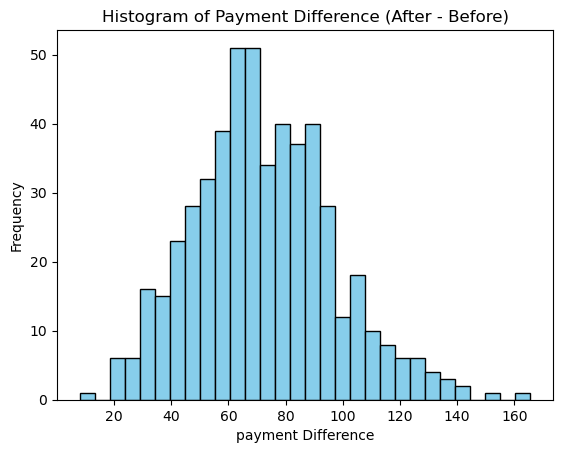

T-Statistic: 66.50556288293608, P-Value: 1.506644649500588e-255


In [109]:
#7.7
#Generating a Histogram
import matplotlib.pyplot as plt

# Generate a histogram of the Payment_Difference
plt.hist(df['payment_Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Payment Difference (After - Before)')
plt.xlabel('payment Difference')
plt.ylabel('Frequency')
plt.show()

#Conducting a One-Sample T-Test
from scipy import stats

# Conduct a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['payment_Difference'].dropna(), 0)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")


7.8
Interpretation:
Statistical Significance: The extremely small p-value (far less than 0.05) indicates that the difference in customer spending before and after the promotion is statistically significant. This means we can confidently reject the null hypothesis that there is no difference in spending due to the promotion program.

Effect Size and Direction: The positive t-statistic suggests that, on average, the amount spent by customers increased after the promotion started. The magnitude of the t-statistic indicates a strong effect size, meaning that the difference is not only statistically significant but also likely to be practically significant.
